In [42]:
import numpy as np
import pandas as pd

In [43]:
df=pd.read_csv('Day033_supply_chain.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [44]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [45]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


Now let's get started with analysis the Supply Chain by looking the the relationship
between thr price of the products and the revenue generated by them;

In [46]:
fig=px.scatter(df,x='Price',
               y='Revenue generated',
               color='Product type',
               hover_data=['Number of products sold'],
               trendline='ols')
fig.show()

Thus , the company drives more revenue from skincare products and the higher the price of skincare products, the more revenue tey generte. Now let's have a look at the sales by product type:

In [47]:
sales_data=df.groupby('Product type')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(sales_data, values='Number of products sold',
                   names='Product type',
                   title='Sales by product Type',
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

So 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics. Now let's have a look at the total revenue generated from shipping carriers:

In [48]:
total_revenue=df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig=go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier',
                  xaxis_title='Shipping Carrier',
                  yaxis_title='Total Revenue')
fig.show()

In [49]:
total_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


So the compamny is using three  carriers for transportaion, and carrier B helps the company in generating more rebenue. Now let's jage look at the Average lead time and Average Manufacturing Costs for all products of the company:

In [50]:
avg_lead_time=df.groupby('Product type')['Lead time'].mean().reset_index()

avg_manufacturing_cost=df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result=pd.merge(avg_lead_time,avg_manufacturing_cost,on='Product type')

result.rename(columns={'Lead time':'Average Lead Time',
                       'Manufacturing costs':'Average Manufacturing Cost'},
              inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Cost
0    cosmetics          13.538462                   43.052740
1     haircare          18.705882                   48.457993
2     skincare          18.000000                   48.993157


# Analyzing SKUs

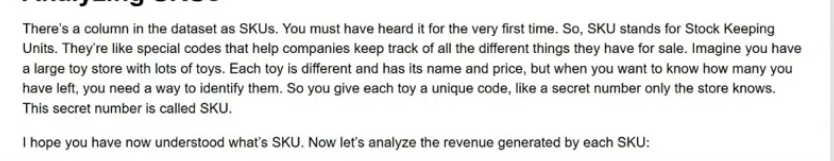

In [51]:
revenue_chart=px.line(df,x='SKU',
                      y='Revenue generated',
                      title='Revenue Generated by SKU')
revenue_chart.show()

There's another coulum in the dataset as Stock levels. Stock levels refer to the number of products a store or business has in its invenory. Now let's have a look at the stock levels of each SKU:

In [55]:
stock_chart=px.line(df,x='SKU',
                    y='Stock levels',
                    title='Stock Levels by SKU')
stock_chart.show()

Now let's have a look at the order quality of each SKU:

In [56]:
order_quantity_chart=px.bar(df,x='SKU',
                            y='Order quantities',
                            title='Order Quantity by SKU')
order_quantity_chart.show()

# Cost Analysis
Now let's analyze the shipping cost of carriers:

In [59]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [60]:
shipping_cost_chart=px.bar(df,x='Shipping carriers',
                     y='Shipping costs',
                     title='Shipping Costs by Carrier')
shipping_cost_chart.show()

In order of the above visualizatios, we discoverd that Carrier B helps the company in more revenue. It is also the most costly Carrier among the three. Now let's have a look at the cost distribution by transportation mode:

In [63]:
transportation_chart=px.pie(df,
                            values='Costs',
                            names='Transportation modes',
                            title='Cost Distribution by Transportation Mode',
                            hole=0.5,
                            color_discrete_sequence=
                            px.colors.qualitative.Pastel)
transportation_chart.show()

# Analyzing Defect Rate
The defect rate in the supply chain refers to the percentage of products that have something wrong or are found broken after shipping. Let's have at the average defect rate of all product types:

In [67]:
defect_rates_by_product=df.groupby('Product type')['Defect rates']\
.mean().reset_index()

fig=px.bar(defect_rates_by_product, x='Product type',
           y='Defect rates',
           title='Average Defect Rates by Product Type')
fig.show()

So the defect rate of haircare products is higher. Now let's have a look at the defect rates by mode of transportation

In [68]:
pivot_table = pd.pivot_table(df, values='Defect rates', 
                             index=['Transportation modes'], 
                             aggfunc='mean')

transportation_chart = px.pie(values=pivot_table["Defect rates"], 
                              names=pivot_table.index, 
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=
                              px.colors.qualitative.Pastel)
transportation_chart.show()

# Day 2

In [52]:
import numpy as np
import pandas as pd

In [53]:
d1={'name':['John','Alice','Bob','James','Beth'],
     'age':[23,34,45,56,67]}
d2={'name':['shyam','Ashutosh','Bob'],'age':[10,12]}


In [54]:
df1=pd.DataFrame(d1)
df2=pd.DataFrame(d2)

ValueError: All arrays must be of the same length

In [ ]:
df1

,name,age
0,John,23
1,Alice,34
2,Bob,45
3,James,56
4,Beth,67


In [ ]:
df1.merge(df2,how='outer')

,name,age
0,Alice,34
1,Ashutosh,12
2,Beth,67
3,Bob,45
4,James,56
5,John,23
6,shyam,10


In [ ]:
df1

,name,age
0,John,23
1,Alice,34
2,Bob,45
3,James,56
4,Beth,67


In [ ]:
concateData=pd.concat([df1,df2],axis=0)
concateData

,name,age
0,John,23
1,Alice,34
2,Bob,45
3,James,56
4,Beth,67
0,shyam,10
1,Ashutosh,12


In [ ]:
df3 = pd.DataFrame({'name': ['Alice', 'Bob', 'David'],
                    'city': ['jaipur', 'delhi', 'mumbai']})

In [ ]:
x1=df1.join(df3,on='name',how='inner')

ValueError: You are trying to merge on object and int64 columns for key 'name'. If you wish to proceed you should use pd.concat

In [ ]:
df1

,name,age
0,John,23
1,Alice,34
2,Bob,45
3,James,56
4,Beth,67


In [ ]:
d1={'name':['John','Alice','Bob','James','Beth'],
     'age':[23,34,45,56,67]}
df1=pd.DataFrame(d1)
d4={'name':['James','Beth'],
     'salary':[1000,2000]}
df4=pd.DataFrame(d4)
pd.concat([df1,df4],join='inner',axis=1)


,name,age,name,salary
0,John,23,James,1000
1,Alice,34,Beth,2000


In [ ]:
df1.merge(df4,how='inner',on='name')

,name,age,salary
0,James,56,1000
1,Beth,67,2000


In [ ]:
df1.merge(df4,how='inner',left_on='name',right_on='name')

,name,age,salary
0,James,56,1000
1,Beth,67,2000


In [ ]:
df1.merge(df4)

,name,age,salary
0,James,56,1000
1,Beth,67,2000
